## Analyzing the Activity, Engagement, and Popularity of Instagram Influencers

This project centers around a comprehensive dataset, capturing intriguing insights into the realm of Instagram influencers. Delving into their origins, follower counts, influence scores, average and total likes, post frequency etc., Our analysis sheds light on their vibrant presence in the social media landscape. Through this exploration, we aim to unravel the dynamics of activity, engagement, and popularity that define the captivating world of social media analytics.

This analysis will answer the following questions:
1. Who are the top 5 most popular influencers?
2. Who are the top 5 most active influencers?
3. Who are the top 5  influencers with highest number of engagements?
4. What are the top 10  countries with the highest numbers of influencers?
5. Who are the top 5  influencers with highest influence score?
6. Are there any relationships between activity (posts), popularity(followers) and engagement(likes)?

**Note: You can find the dashboard with the accompanying charts located at the bottom of this page**

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
influence = pd.read_excel('top_insta_influencers_data.xlsx')

In [3]:
# Print the five 5 rows of the dataframe
influence.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,0.0139,6.5m,29.0b,Portugal
1,2,kyliejenner,91,6.9k,366.2m,8.3m,0.0162,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,0.0124,4.4m,6.0b,Argentina
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.0097,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.002,665.3k,12.5b,United States


In [4]:
# Print the last 5 rows of the dataframe
influence.tail()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
195,196,iambeckyg,71,2.3k,33.2m,623.8k,0.014,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.0064,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.0026,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,0.0142,467.7k,1.7b,United States
199,200,raisa6690,80,4.2k,32.8m,232.2k,0.003,97.4k,969.1m,Indonesia


In [5]:
# Print the shape of the dataframe
influence.shape

(200, 10)

In [6]:
# Print basic info about the dataframe
influence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            200 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


Oberservation

There are some columns that should be represented as integers such as, "followers," "posts," "new_post_avg_like," "total_likes," and "avg_likes," but are currently in the string format. Therefore, we will convert these columns from strings to integers. 

In [7]:
# Print summary statistics the dataframe
influence.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


Let's examine the dataframe for missing values and duplicated entries. If there are any, we'll perform the required operations to adrress them. 

In [8]:
# Inspect the dataframe for missing values
influence.isnull().any()

rank                 False
channel_info         False
influence_score      False
posts                False
followers            False
avg_likes            False
60_day_eng_rate      False
new_post_avg_like    False
total_likes          False
country              False
dtype: bool

In [9]:
influence.duplicated().sum()

0

Based on the examination of the dataframe, it evident that there are neither missing values nor duplicated entries. Therefore, we can proceed with our analysis. As a precautionary step, we'll make a copy of the dataframe to ensure data integrity and preservation in case of any data loss or accidental modifications during the analysis

In [10]:
# Make a copy of the dataframe
influence_copy = influence.copy()
influence_copy.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,0.0139,6.5m,29.0b,Portugal
1,2,kyliejenner,91,6.9k,366.2m,8.3m,0.0162,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,0.0124,4.4m,6.0b,Argentina
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.0097,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.002,665.3k,12.5b,United States


As part of our data cleaning process, we will proceed to drop columns that are irrelevant to our analysis. In this case, we will remove the "rank" column from the dataframe since this column does not contribute to the insights we seek to gain

In [11]:
# Remove the "rank" column from the dataframe
influence_copy.drop('rank', axis=1, inplace=True)
influence_copy.head()

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,cristiano,92,3.3k,475.8m,8.7m,0.0139,6.5m,29.0b,Portugal
1,kyliejenner,91,6.9k,366.2m,8.3m,0.0162,5.9m,57.4b,United States
2,leomessi,90,0.89k,357.3m,6.8m,0.0124,4.4m,6.0b,Argentina
3,selenagomez,93,1.8k,342.7m,6.2m,0.0097,3.3m,11.5b,United States
4,therock,91,6.8k,334.1m,1.9m,0.002,665.3k,12.5b,United States


To obtain the insights we intend to generate, we need to work with certain columns, namely 'followers', 'posts', 'total_likes,' and 'avg_likes,' which are currently in string format and not in the desired numeric format (float). To rectify this, we will convert these columns from strings to floats

In [12]:
# Convert the "total_likes" column from string to float
replace_dict = {'b':'e9', 'm':'e6'}
influence_copy['overall_likes'] = influence_copy['total_likes'].replace(replace_dict, regex=True).astype(float)

# Convert the "posts" column from string to float
influence_copy['total_posts'] = influence_copy['posts'].str.replace("k", "e3").astype(float)

# Convert the "followers" column from string to float
influence_copy['no_of_followers'] = influence_copy['followers'].str.replace("m", "e6").astype(float)

# Convert the "avg_likes" column from string to float
substitutes = {'m':'e6', 'k':'e3'}
influence_copy['average_likes'] = influence_copy['avg_likes'].replace(substitutes, regex=True).astype(float)



Now that we have successfully transformed our desired columns into the appropriate format, it is essential to maintain data integrity and accuracy by removing the old columns from the dataset

In [13]:
# Remove the old columns from the dataframe
unneeded_columns = [ 'posts', 'followers', 'avg_likes', 'total_likes']
influence_copy.drop(unneeded_columns, axis=1, inplace=True)
influence_copy.head()

,channel_info,influence_score,60_day_eng_rate,new_post_avg_like,country,overall_likes,total_posts,no_of_followers,average_likes
0,cristiano,92,0.0139,6.5m,Portugal,2.900000e+10,3300.0,475800000.0,8700000.0
1,kyliejenner,91,0.0162,5.9m,United States,5.740000e+10,6900.0,366200000.0,8300000.0
2,leomessi,90,0.0124,4.4m,Argentina,6.000000e+09,890.0,357300000.0,6800000.0
3,selenagomez,93,0.0097,3.3m,United States,1.150000e+10,1800.0,342700000.0,6200000.0
4,therock,91,0.002,665.3k,United States,1.250000e+10,6800.0,334100000.0,1900000.0


The next thing we will do is to check for outliers in our desired columns 

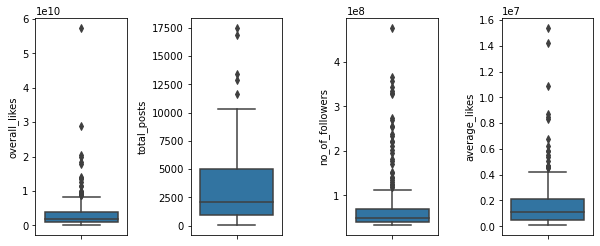

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
sns.boxplot(data=influence_copy, y='overall_likes', ax=ax[0])
sns.boxplot(data=influence_copy, y='total_posts', ax=ax[1])
sns.boxplot(data=influence_copy, y='no_of_followers', ax=ax[2])
sns.boxplot(data=influence_copy, y='average_likes', ax=ax[3]);

fig.subplots_adjust(hspace=0.5, wspace=0.7)


The analysis identifies outliers in the data, but due to the small dataset size of 200 rows and the dynamic nature of social media platforms like Instagram, where viral content and celebrity influencers can significantly impact metrics such as number of followers, total likes, number of posts, and average likes, resulting in the presence of extreme values, we have made a deliberate decision to treat these data points as genuine observations. By retaining these outliers, our analysis is better equipped to capture the full range of variations and nuances present in the data, leading to a more comprehensive understanding of user behavior and platform dynamics.


Now, before delving into answering our research questions, we will define essential Key Performance Indicators (KPIs):
1. Number of channels/influencers
2. Number of countries
3. Average total Likes
4. Average number of posts
5. Average number of followers

In [15]:
# Get the total number of the channels/influencers
channels = influence_copy['channel_info'].nunique()
channels

200

In [16]:
# Get the total number of country of origin of the channels/influencers
countries = influence_copy['country'].nunique()
countries

29

In [17]:
# Get the average number of total likes accumulated made by the channels/influencers
average_total_likes = round(influence_copy['overall_likes'].mean()/1000000000, 2) 
average_total_likes

3.66

In [18]:
# Get the average number of posts made by the channels/influencers
average_posts =  round(influence_copy['total_posts'].mean()/1000, 1) 
average_posts

3.5

In [19]:
# Get the average number of followers of the channels/influencers
average_followers = round(influence_copy['no_of_followers'].mean()/1000000, 2) 
average_followers

77.41

With these KPIs established, we can now proceed with our analysis to address our research questions 

**QUESTION 1**: Who are the top 5 most popular influencers?

In [20]:
# Get the top 5 most popular influencers
top_influencers = influence_copy.nlargest(5,  'no_of_followers')[['channel_info', 'no_of_followers']]
top_influencers

,channel_info,no_of_followers
0,cristiano,475800000.0
1,kyliejenner,366200000.0
2,leomessi,357300000.0
3,selenagomez,342700000.0
4,therock,334100000.0


**QUESTION 2**: Who are the top 5 most active influencers?

In [21]:
# Get the top 5 most active influencers
most_active_influencers = influence_copy.nlargest(5, 'total_posts')[['channel_info', 'total_posts']]
most_active_influencers

,channel_info,total_posts
62,raffinagita1717,17500.0
123,natgeotravel,16900.0
159,ruben_onsu,13400.0
47,nba,12900.0
153,worldstar,11600.0


**QUESTION 3**: Who are the top 5 influencers with highest number of engagements?

In [22]:
# Get the top 5 influencers with highest number of engagements
most_engaged_influencers = influence_copy.nlargest(5, 'overall_likes')[['channel_info', 'overall_likes']]
most_engaged_influencers

,channel_info,overall_likes
1,kyliejenner,5.740000e+10
0,cristiano,2.900000e+10
22,zendaya,2.060000e+10
5,kimkardashian,1.990000e+10
6,arianagrande,1.840000e+10


**QUESTION 4**: What are the top 10 countries with the highest number of influencers?

In [23]:
# Get the top 10 countries with the highest number of influencers
influencers_origin = influence_copy['country'].value_counts().nlargest(10).reset_index()
influencers_origin.columns = ['country', '# of influencers']
influencers_origin

,country,# of influencers
0,United States,83
1,India,24
2,Brazil,15
3,Indonesia,11
4,France,8
5,Spain,7
6,South Korea,7
7,United Kingdom,6
8,Canada,5
9,Germany,4


**QUESTION 5**: Who are the top 5 influencers with the highest influence score?

In [24]:
# Get the top 5 influencers with the highest influence score
most_influencial = influence_copy.nlargest(5,'influence_score')[['channel_info', 'influence_score']]
most_influencial

,channel_info,influence_score
3,selenagomez,93
0,cristiano,92
6,arianagrande,92
7,beyonce,92
20,katyperry,92


**QUESTION 6**: Are there any relationships between popularity(followers), activity (posts) and engagement(likes)?

In [25]:
# Select the numeric columns for correlation analysis 
data = influence_copy[['no_of_followers', 'total_posts', 'average_likes']]
# Calculate the correlation coefficients
corr_coeffient = data.corr()
corr_coeffient

,no_of_followers,total_posts,average_likes
no_of_followers,1.000000,0.060398,0.349195
total_posts,0.060398,1.000000,-0.343087
average_likes,0.349195,-0.343087,1.000000


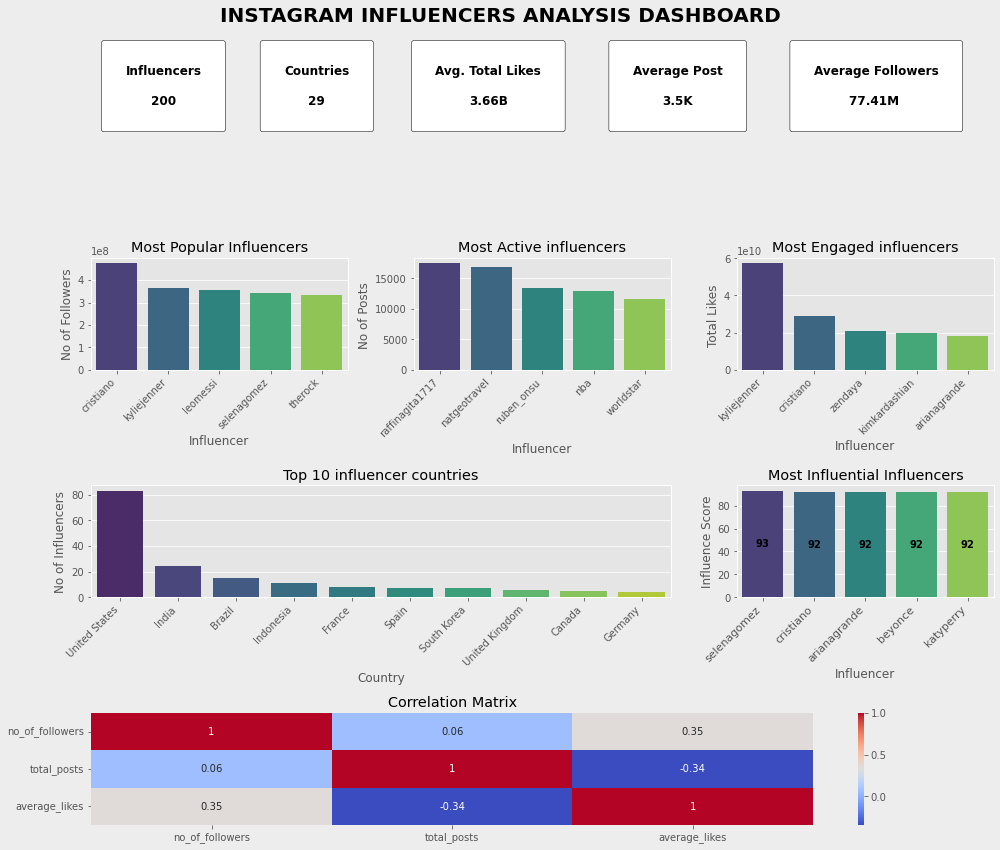

In [27]:

# Set the style for the plot
plt.style.use('ggplot')
fig, ax = plt. subplots(figsize=(14,12))
gs = fig.add_gridspec(4,3)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,:2])
ax6 = fig.add_subplot(gs[2,2])
ax7 = fig.add_subplot(gs[3,:])

# Disable the axis labels, ticks, and grid lines in the main plot (ax)
ax.axis('off')

# Disable the axis labels, ticks, and grid lines in the ax1 plot
ax1.axis('off')

# Display the KPIs

# Influencer KPI
ax1.text(0.08, 0.5, f"Influencers\n\n{channels}", va='center', ha='center',fontsize=12, fontweight='bold', 
         bbox=dict(facecolor='white', edgecolor='black',boxstyle='round, pad=2, rounding_size=0.2' ))

# Country KPI
ax1.text(0.25, 0.5, f"Countries\n\n{countries}", va='center', ha='center',fontsize=12, fontweight='bold', 
         bbox=dict(facecolor='white', edgecolor='black',boxstyle='round, pad=2, rounding_size=0.2' ))

# Average Total likes KPI
ax1.text(0.44, 0.5, f"Avg. Total Likes\n\n{str( average_total_likes)+'B'}", va='center', ha='center',
         fontsize=12, fontweight='bold', 
         bbox=dict(facecolor='white', edgecolor='black',boxstyle='round, pad=2, rounding_size=0.2'))

# Average Post KPI
ax1.text(0.65, 0.5, f"Average Post\n\n{str(average_posts)+'K'}", va='center', ha='center',
         fontsize=12, fontweight='bold', 
         bbox=dict(facecolor='white', edgecolor='black',boxstyle='round, pad=2, rounding_size=0.2'))

# Average Followers KPI
ax1.text(0.87, 0.5, f"Average Followers\n\n{str(average_followers)+'M'} ", va='center', ha='center',
        fontsize=12, fontweight='bold', 
         bbox=dict(facecolor='white', edgecolor='black',boxstyle='round, pad=2, rounding_size=0.2')) 

# Q1 --- Plot the bar chart for the top 5 most popular influencers
sns.barplot(data=top_influencers, x='channel_info', y='no_of_followers', palette='viridis', ax=ax2)
ax2.set_xlabel('Influencer')
ax2.set_xticklabels(top_influencers['channel_info'], rotation=45, ha='right')
ax2.set_ylabel('No of Followers')
ax2.set_title('Most Popular Influencers')

# Q2 --- Plot the bar chart for the top 5 most active influencers
sns.barplot(data=most_active_influencers, x='channel_info', y='total_posts', palette='viridis', ax=ax3)
ax3.set_xlabel('Influencer')
ax3.set_xticklabels(most_active_influencers['channel_info'], rotation = 45, ha='right')
ax3.set_ylabel('No of Posts ')
ax3.set_title('Most Active influencers')

# Q3 --- Plot the bar chart for the top 5 most engaged influencers  
sns.barplot(data=most_engaged_influencers, x='channel_info', y='overall_likes', palette='viridis', ax=ax4)
ax4.set_xlabel('Influencer')
ax4.set_xticklabels(most_engaged_influencers['channel_info'], rotation = 45, ha='right')
ax4.set_ylabel('Total Likes ')
ax4.set_title('Most Engaged influencers')



# Q4 --- Plot the bar chart for the top 10 influencer countries 
sns.barplot(data=influencers_origin, y='# of influencers', x='country', palette='viridis',  ax=ax5);
ax5.set_xlabel('Country')
ax5.set_xticklabels(influencers_origin['country'], rotation = 45, ha='right')
ax5.set_ylabel('No of Influencers')
ax5.set_title('Top 10 influencer countries')

# Q5 --- Plot the bar chart for the top 5 influencer with the highest influence score
sns.barplot(data=most_influencial, x='channel_info', y= 'influence_score', palette='viridis', ax=ax6)
ax6.set_xlabel('Influencer')
ax6.set_xticklabels(most_influencial['channel_info'], rotation = 45, ha='right', fontsize=11)
ax6.set_ylabel('Influence Score')
ax6.set_title('Most Influential Influencers')

for p in ax6.patches:
    ax6.text(p.get_x() + p.get_width()/2, p.get_height()/2, int(p.get_height()),
            ha='center', va='center', fontsize=10, fontweight='bold')
    
# Q6 --- Plot the correlation matrix
sns.heatmap(corr_coeffient, cmap='coolwarm', annot=True, ax=ax7)
ax7.set_title('Correlation Matrix')


plt.suptitle('Instagram Influencers Analysis Dashboard'.upper(), fontsize=20, fontweight='bold')
fig.subplots_adjust(hspace=0.9, wspace=0.8)
fig.patch.set_facecolor('#EEEDED')
fig.tight_layout()



**INSIGHTS**
1. Popularity: **Cristiano Ronaldo** leads the pack with a remarkable **475.8** million followers on Instagram. **Kylie Jenner** follows closely with **366.2** million followers. **Leo Messi** claims third place with **357.3** million followers, while **Selena Gomez** and **The Rock** round out the top five with **342.7** million and **334.1** million followers, respectively.


2. Activity: **@raffinagita1717** holds the record for the highest activity among Instagram influencers with **17.5K** posts, closely followed by @natgeotravel with **16.9K** posts..


3. Engagement: **Kylie Jenner** leads in likes, amassing an impressive **57.4** billion likes, trailed by **Cristiano Ronaldo** with **29** billion likes.

 
4. Country of Origin: The **United States** leads with the highest number of influencers at **83** individuals, followed by **India** with **24** influencers, and **Brazil** with **15** influencers.


5. Influence Score: **Selena Gomez** holds the top influence score of **93**. Following closely are **Cristiano Ronaldo**, **Ariana Grande**, **Beyonce**, and **Katy Perry**, each boasting an influence score of **92**."

6. Relationship between Popularity, Activity, and Engagement: 

	a) We observed a subtle, weak positive relationship (0.06r) between **popularity** (follower count) and **activity** (post          frequency). This suggests that frequent posting on Instagram does not necessarily lead to a large following.  

	b) We uncovered a mild, weak positive relationship (0.35r) between **engagement** (likes) and **popularity** (follower              count). This finding underscores that a high number of followers does not guarantee extensive engagement. Aspects such as        content quality, niche targeting, audience targeting, and timing also wield significant influence.
    
	c) A weak negative relationship (-0.34r) was observed between **engagement** (likes) and **activity** (post frequency). This        suggests that frequent posting may lead to lower engagement. Excessive posting might dilute engagement levels, as                followers may become overwhelmed with content and engage less. Thus, a holistic approach focusing on content quality,            audience preferences, timing, hashtags, and location tags is paramount for sustainable engagement.


Thank you for your time and attention. This brings our analysis to a close.